# Digital Marketing Conversion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
file_path = 'data/digital_marketing_campaign_dataset.csv'
df = pd.read_csv(file_path)

# Drop confidential columns and identifier column
df.drop(['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'], axis=1, inplace=True)

# Display the first few rows of the dataframe
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


## Basic Data Exploration

In [3]:
# Get a summary of the dataset
df.info()

# Get descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum().max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

0

## Data Visualization

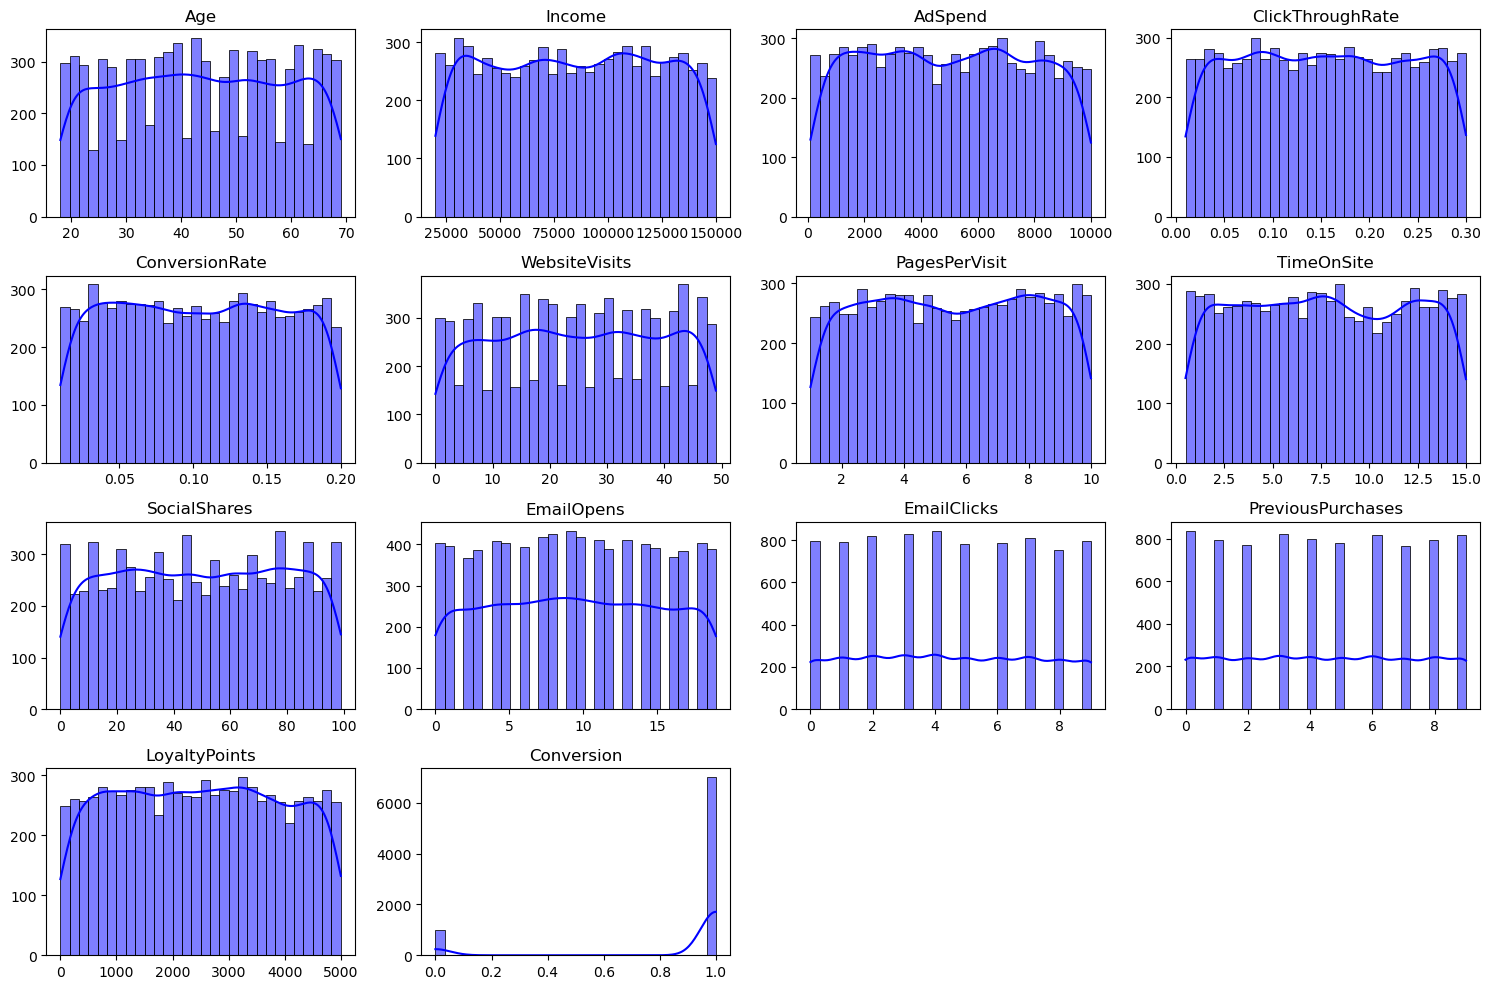

In [4]:
# Visualize the distribution of numerical features using Seaborn
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

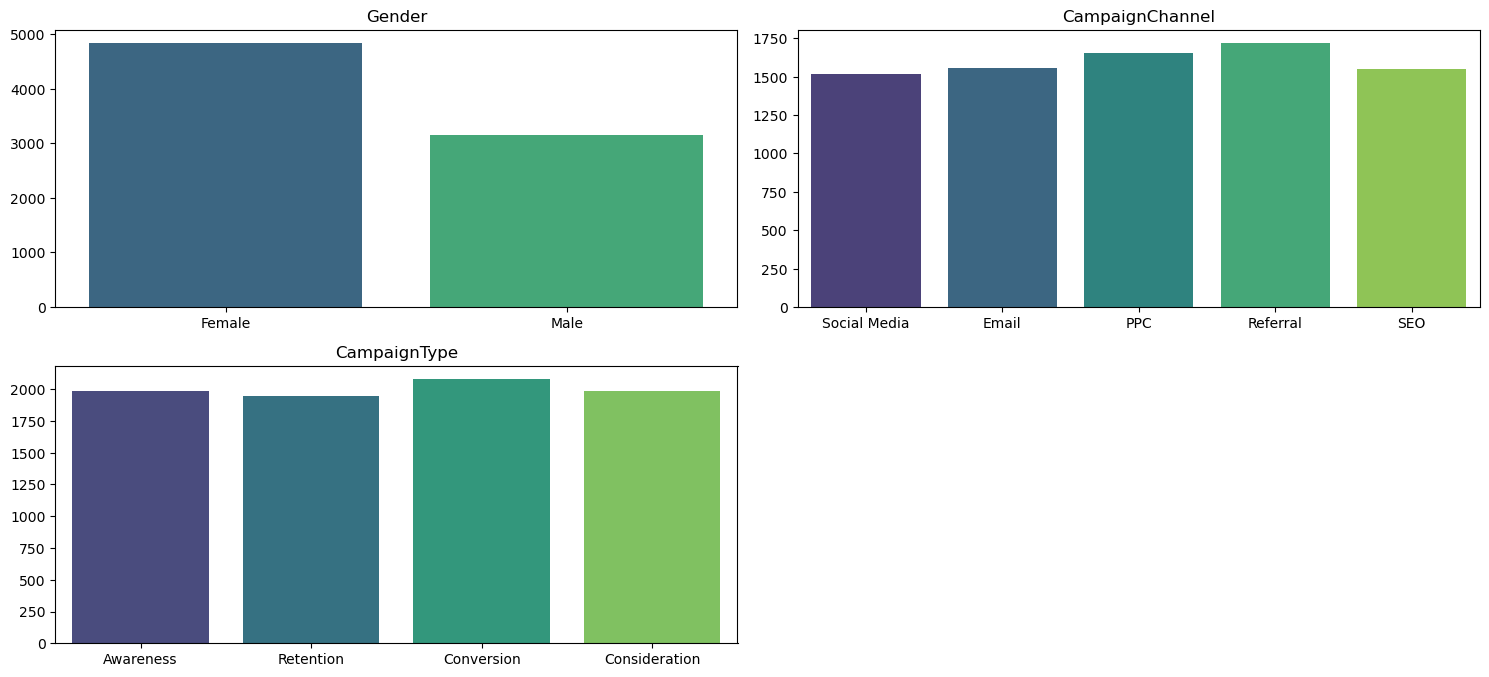

In [5]:
# Visualize the distribution of categorical features using Seaborn
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

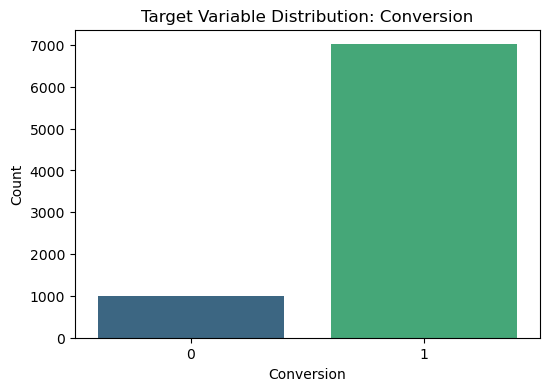

In [6]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Conversion', palette='viridis')
plt.title('Target Variable Distribution: Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.show()

In [7]:
df.Conversion.value_counts(normalize=True)

1    0.8765
0    0.1235
Name: Conversion, dtype: float64

## Preprocessing

### Feature Encoding

In [8]:
# Encoding all categorical variables
categorical_features = ['Gender', 'CampaignChannel', 'CampaignType']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded dataframe to ensure proper encoding
df_encoded.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,688,1,0,0,0,0,1,0,0,0
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,3459,1,1,0,0,0,0,0,0,1
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,2337,1,0,1,0,0,0,0,0,0
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,2463,1,0,1,0,0,0,0,1,0
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,4345,1,0,1,0,0,0,0,1,0


### Feature Engineering

In [9]:
# Feature engineering examples
df_encoded['EmailEngagement'] = df_encoded['EmailOpens'] + df_encoded['EmailClicks']
df_encoded['SiteEngagement'] = df_encoded['WebsiteVisits'] * df_encoded['PagesPerVisit'] * df_encoded['TimeOnSite']
df_encoded['IncomePerClick'] = df_encoded['Income'] / (df_encoded['ClickThroughRate'] + 1)  # Avoiding division by zero
df_encoded['AdSpendPerClick'] = df_encoded['AdSpend'] / (df_encoded['ClickThroughRate'] + 1)  # Avoiding division by zero
df_encoded['ClickToConversionRate'] = df_encoded['ConversionRate'] / (df_encoded['ClickThroughRate'] + 1)  # Avoiding division by zero
df_encoded['TotalInteractions'] = df_encoded['WebsiteVisits'] + df_encoded['EmailOpens'] + df_encoded['EmailClicks'] + df_encoded['SocialShares']

# Display the first few rows of the dataframe with new features
df_encoded.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,EmailEngagement,SiteEngagement,IncomePerClick,AdSpendPerClick,ClickToConversionRate,TotalInteractions
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,1,0,0,0,15,0.000000,131151.999502,6224.499328,0.084328,34
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,0,0,0,1,9,655.793108,36133.160944,3373.352974,0.158104,56
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,0,0,0,0,13,226.888030,69242.009306,1210.521530,0.059823,15
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,0,0,1,0,4,3134.851039,38752.253778,474.262130,0.077359,140
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,0,0,1,0,12,0.000000,67018.338859,1339.379886,0.087752,18


In [10]:
# Drop redundant features based on correlation analysis
redundant_features = ['EmailOpens', 'EmailClicks', 'WebsiteVisits', 'PagesPerVisit', 'AdSpend']
df_encoded.drop(redundant_features, axis=1, inplace=True)

In [11]:
# Replace any infinite values with NaN and then fill NaNs with 0
df_encoded.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df_encoded.fillna(0, inplace=True)

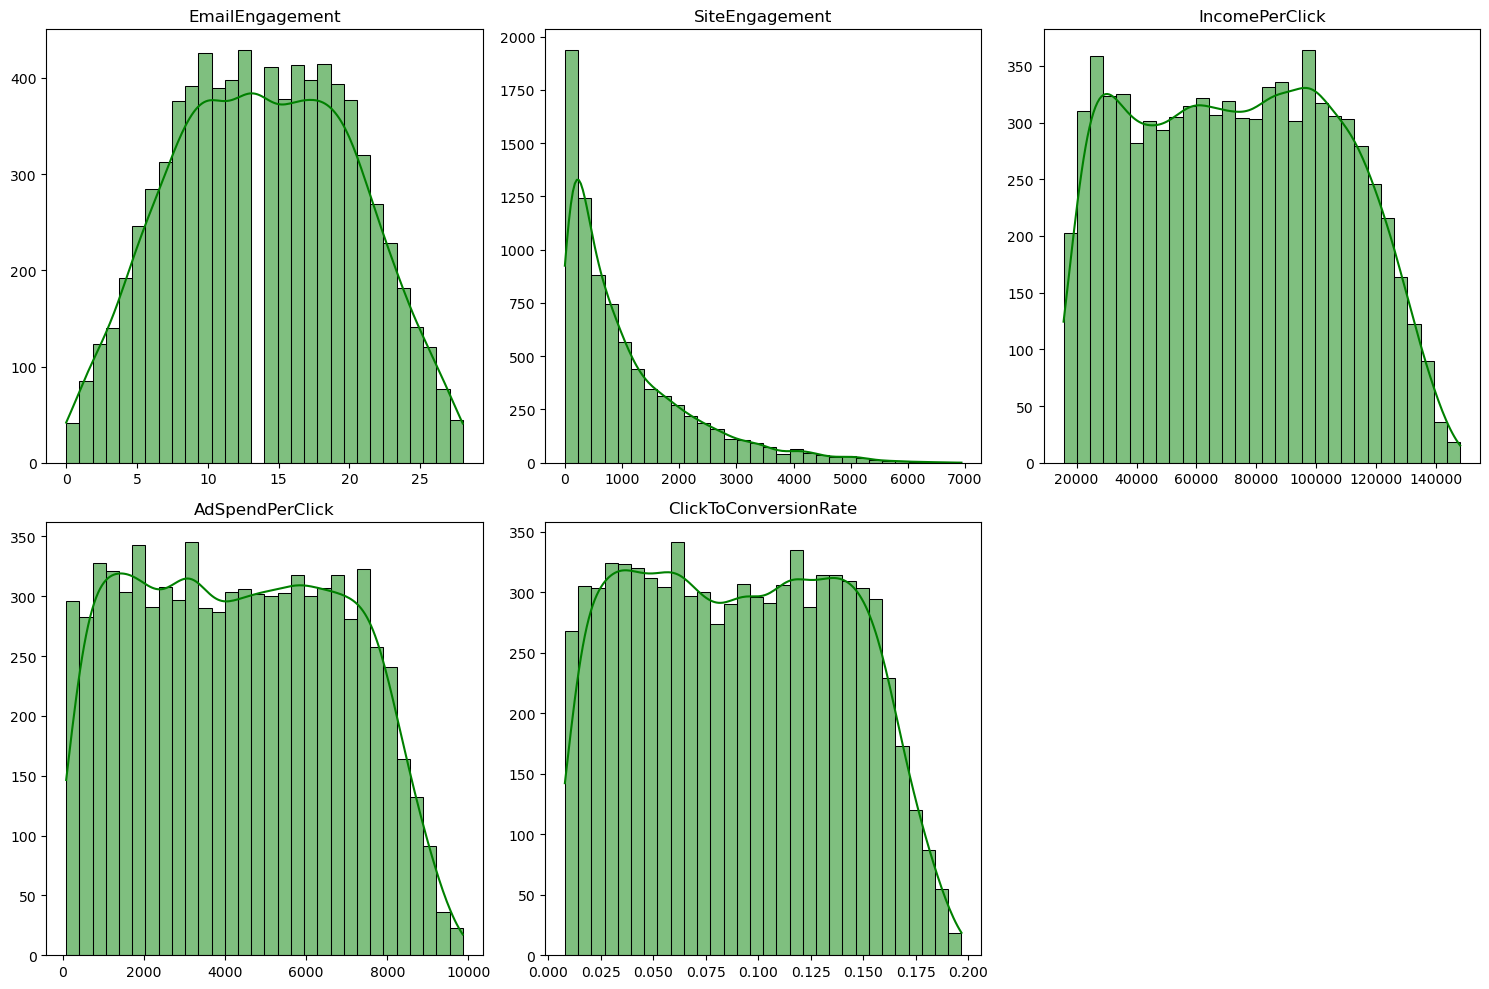

In [12]:
# Visualize the distribution of engineered numerical features using Seaborn
engineered_numerical_features = ['EmailEngagement', 'SiteEngagement', 'IncomePerClick', 
                                 'AdSpendPerClick', 'ClickToConversionRate']

num_engineered_features = len(engineered_numerical_features)
num_cols = 3
num_rows = (num_engineered_features // num_cols) + (num_engineered_features % num_cols > 0)

plt.figure(figsize=(15, num_rows * 5))
for i, feature in enumerate(engineered_numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_encoded[feature], bins=30, kde=True, color='green')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

### Correlation Matrix

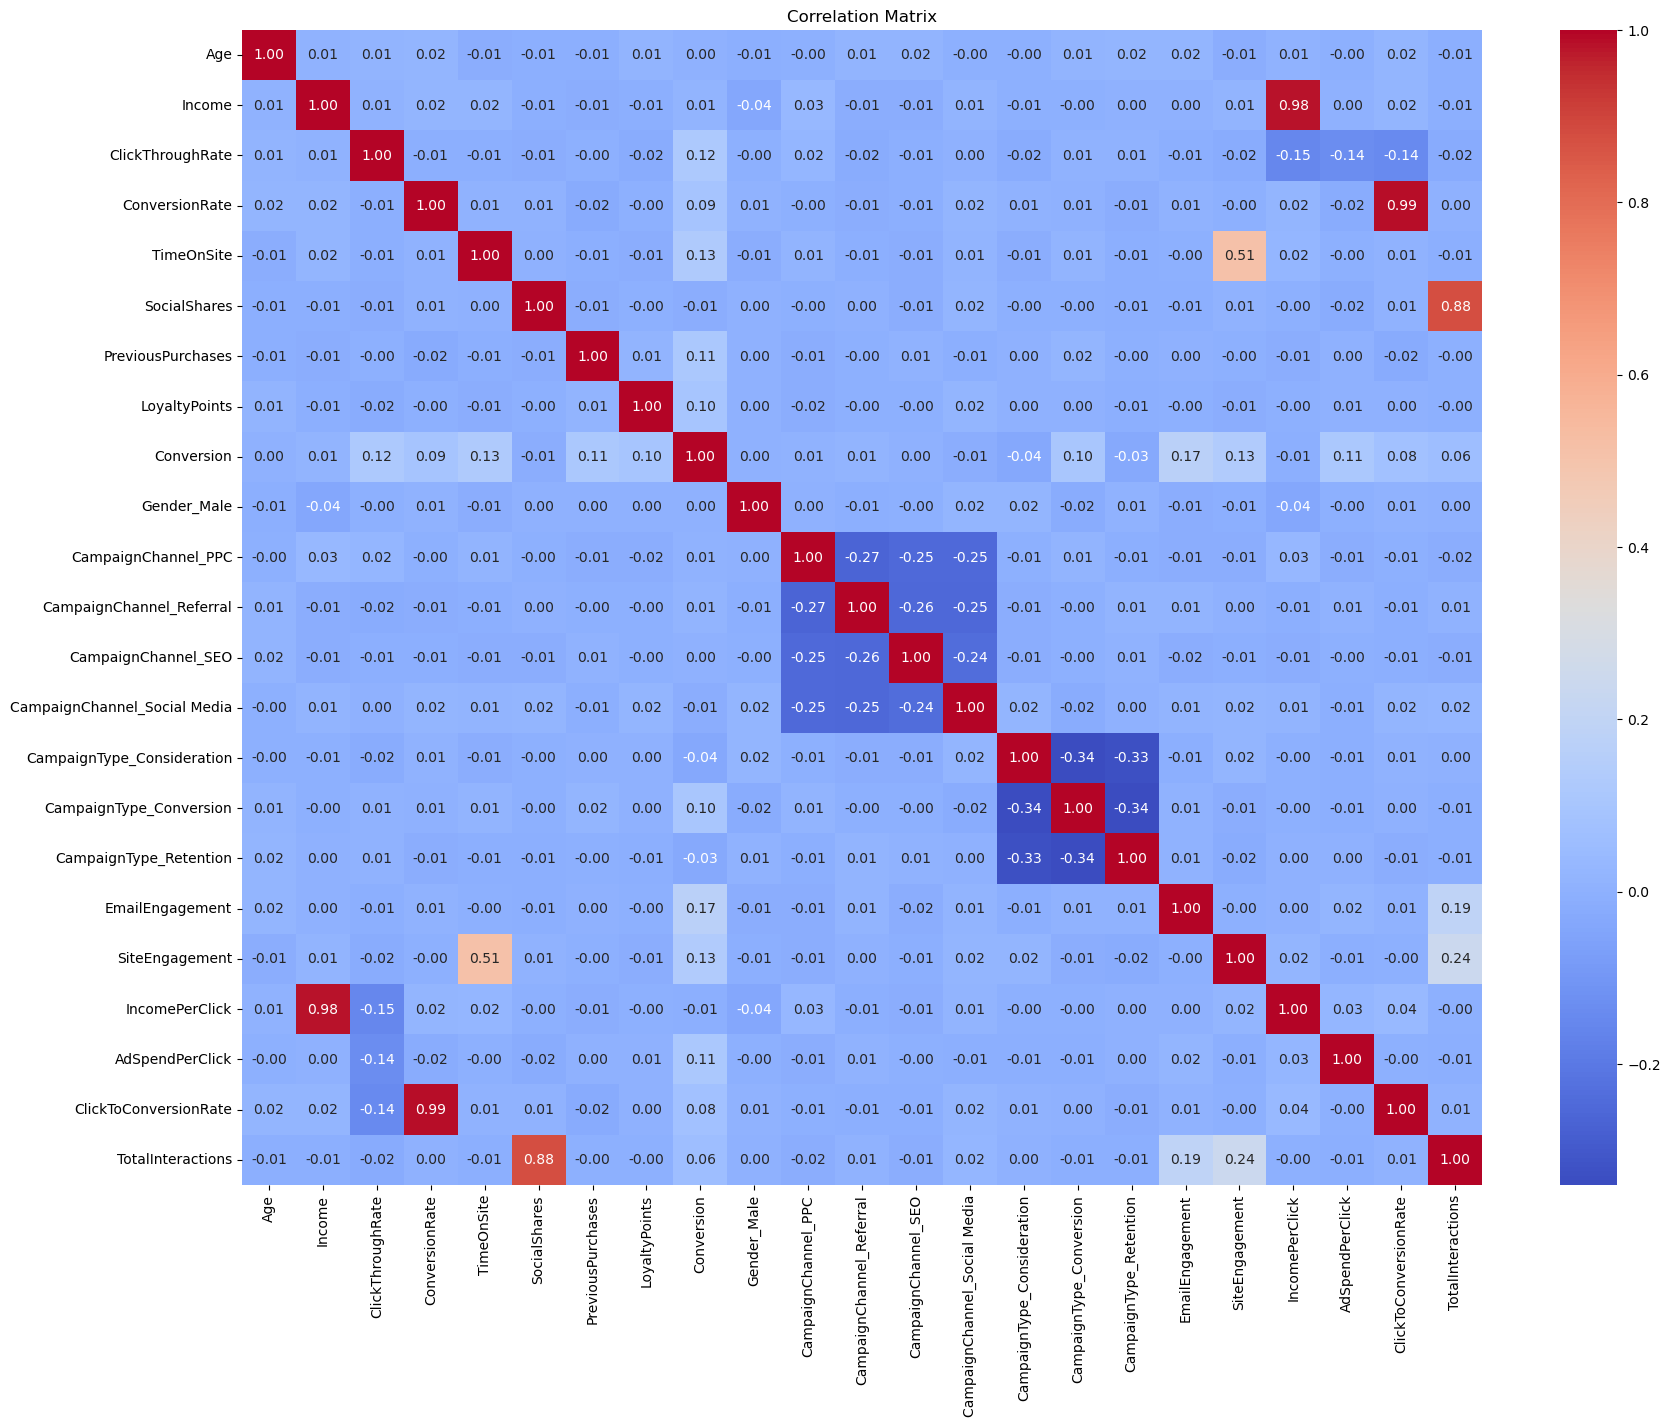

In [13]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Predicting Customer Conversion

### Training and Test Split

In [14]:
# Split the original data into training and test sets
X = df_encoded.drop('Conversion', axis=1)
y = df_encoded['Conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### Apply SMOTE to Training Data

In [15]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Baseline XGBoost Classifier

In [16]:
# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[ 103  193]
 [ 134 1970]]
              precision    recall  f1-score   support

           0       0.43      0.35      0.39       296
           1       0.91      0.94      0.92      2104

    accuracy                           0.86      2400
   macro avg       0.67      0.64      0.65      2400
weighted avg       0.85      0.86      0.86      2400



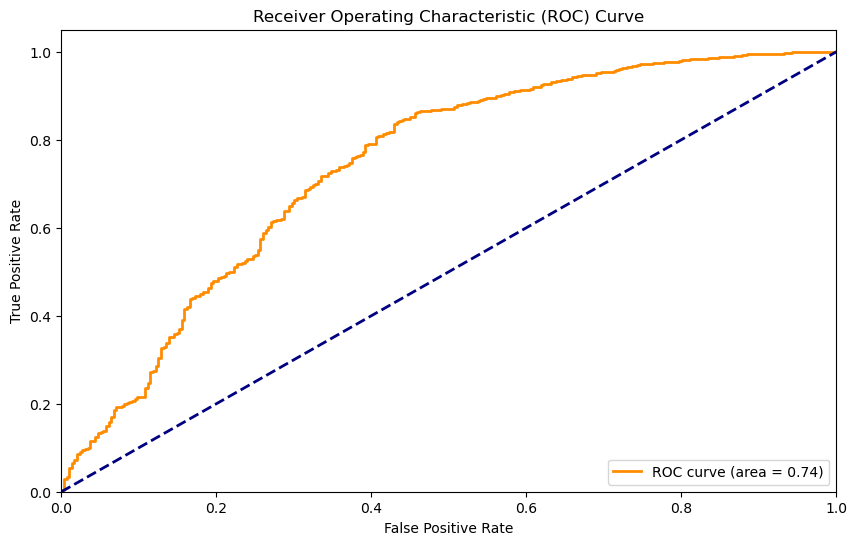

In [17]:
# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

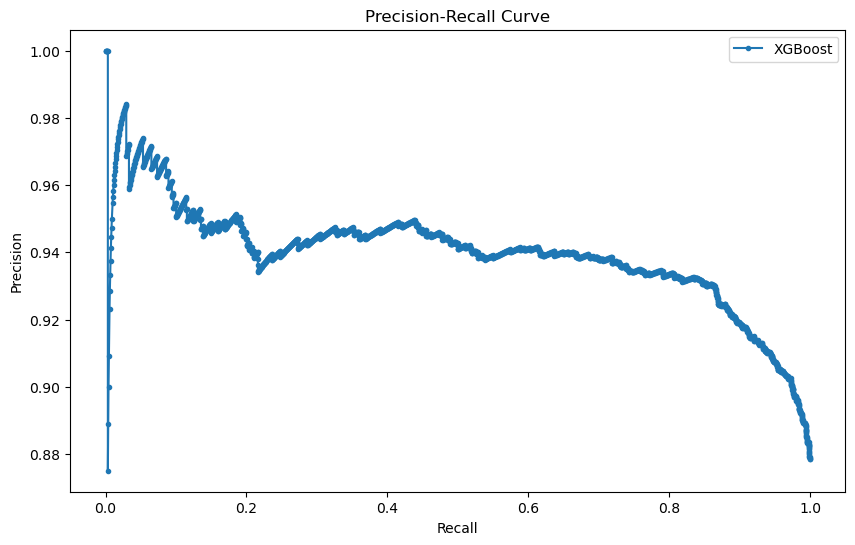

In [18]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_xgb)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [19]:
# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2,
                               scoring='f1')

grid_search_xgb.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters found: {grid_search_xgb.best_params_}")

# Evaluate the best model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
[[  82  214]
 [  23 2081]]
              precision    recall  f1-score   support

           0       0.78      0.28      0.41       296
           1       0.91      0.99      0.95      2104

    accuracy                           0.90      2400
   macro avg       0.84      0.63      0.68      2400
weighted avg       0.89      0.90      0.88      2400



In [20]:
# Evaluate the best XGBoost model using cross-validation
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=5, scoring='f1')
print(f"Cross-validation scores: {cv_scores_xgb}")
print(f"Mean cross-validation score: {cv_scores_xgb.mean()}")

Cross-validation scores: [0.96019218 0.95407814 0.95768834 0.93667457 0.92717465]
Mean cross-validation score: 0.9471615728259474


### XGBoost Feature Importance

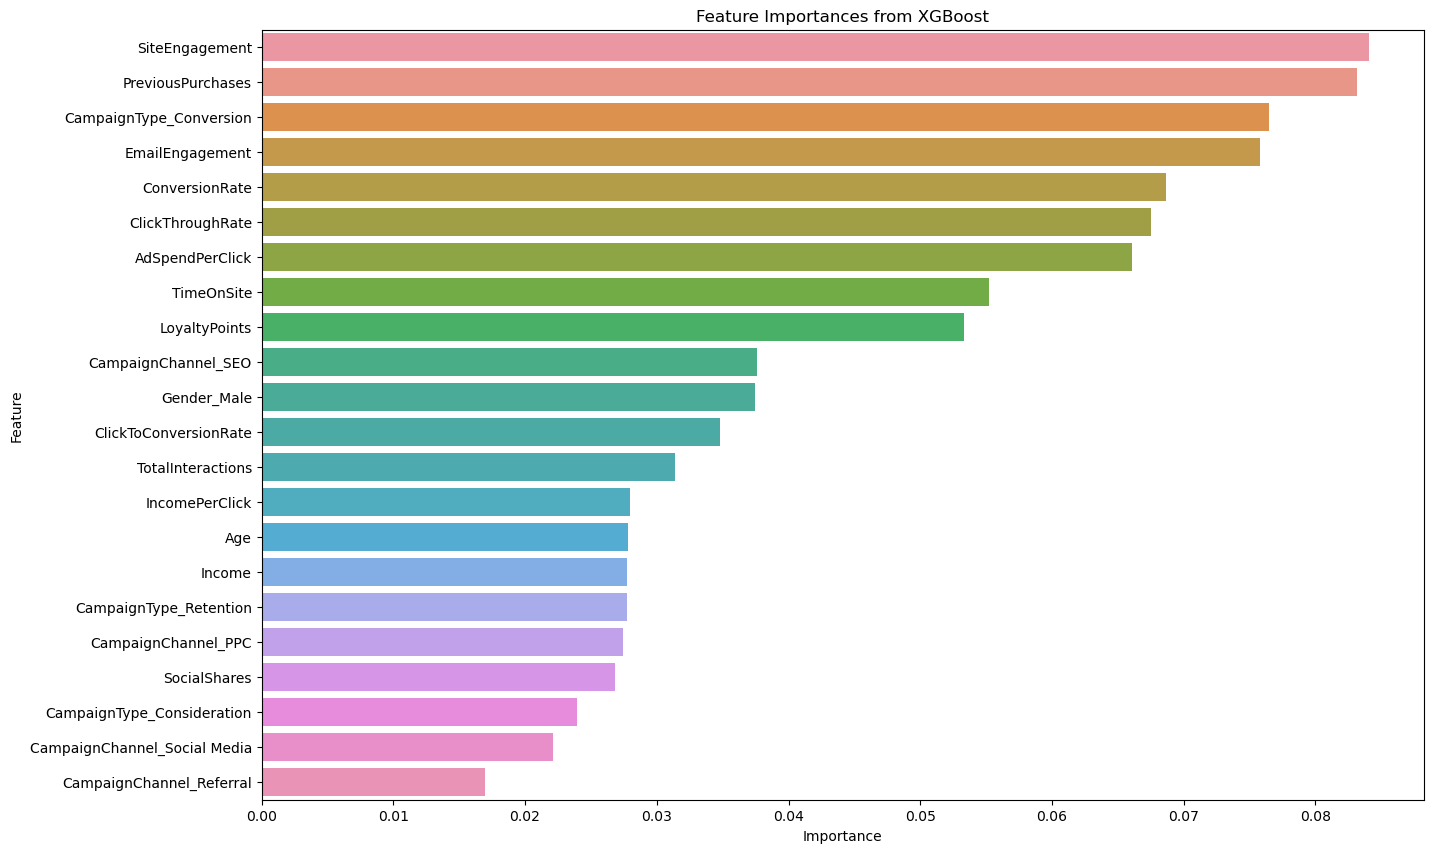

In [21]:
# Get feature importances from the best XGBoost model
importances_xgb = best_xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features_xgb = X_train.columns

# Create a DataFrame for plotting
feature_importance_df_xgb = pd.DataFrame({
    'Feature': features_xgb[indices_xgb],
    'Importance': importances_xgb[indices_xgb]
})

# Plot the feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb)
plt.title('Feature Importances from XGBoost')
plt.show()

### Confusion Matrix

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


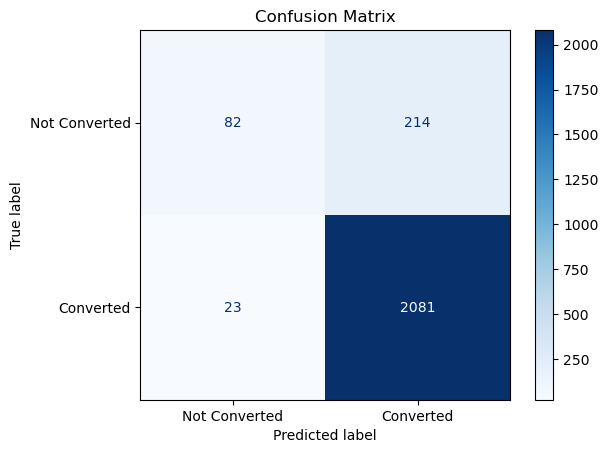

In [22]:
# Confusion Matrix
plot_confusion_matrix(best_xgb_model, X_test, y_test, display_labels=['Not Converted', 'Converted'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Precision-Recall Curve

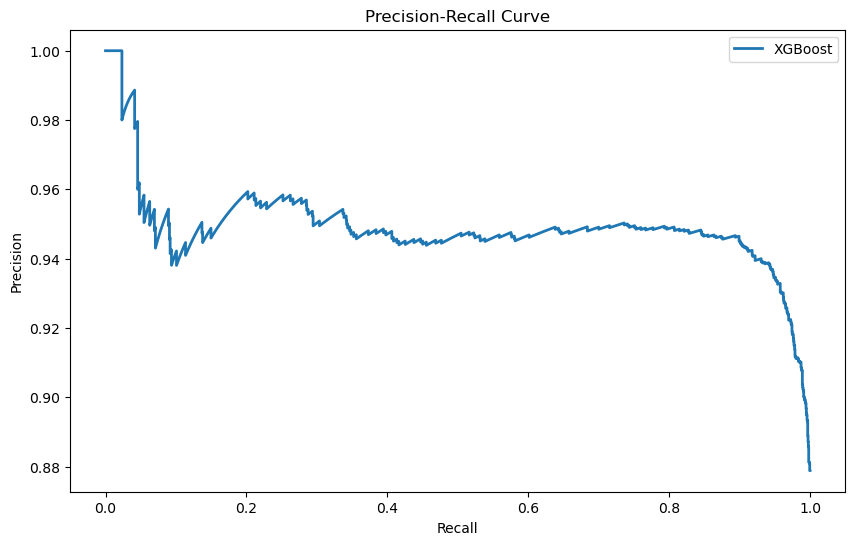

In [23]:
# Precision-Recall Curve
y_scores = best_xgb_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='XGBoost', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### ROC Curve

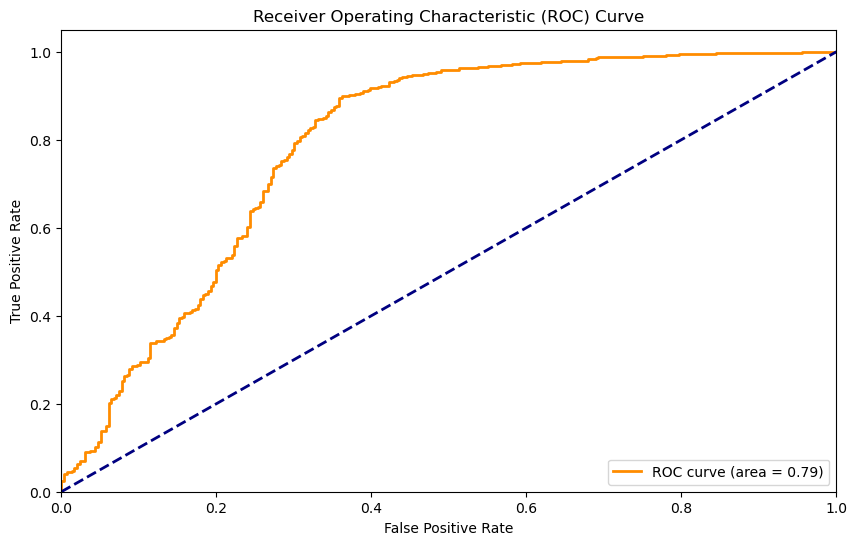

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Customer Segmentation

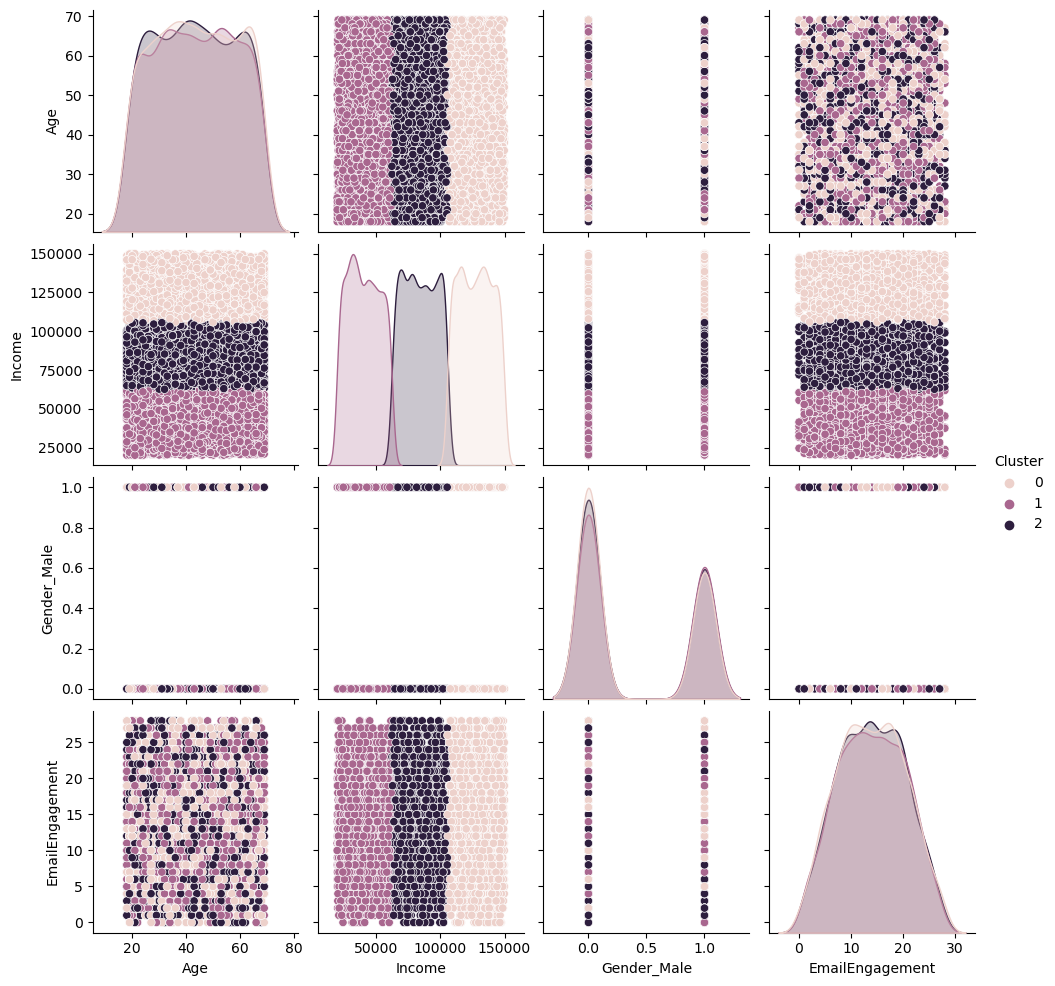

,Age,Income,ClickThroughRate,ConversionRate,TimeOnSite,SocialShares,PreviousPurchases,LoyaltyPoints,Conversion,Gender_Male,...,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,EmailEngagement,SiteEngagement,IncomePerClick,AdSpendPerClick,ClickToConversionRate,TotalInteractions
Cluster,,,,,,,,,,,,,,,,,,,,,
0,43.827866,127495.820494,0.156394,0.105475,7.811524,49.555474,4.444158,2485.587173,0.882049,0.374493,...,0.194250,0.251382,0.251382,0.247328,13.917803,1073.047025,110869.269867,4380.871689,0.091701,87.959823
1,43.588889,40635.213410,0.153840,0.102794,7.637263,49.867816,4.529119,2516.933716,0.871648,0.417241,...,0.180843,0.258238,0.254023,0.247126,13.944828,1047.051146,35414.332554,4316.506203,0.089600,88.493103
2,43.456108,84183.603287,0.154206,0.104844,7.730976,49.980949,4.484871,2469.014942,0.875607,0.394471,...,0.194247,0.236085,0.273440,0.235712,13.970489,1050.549716,73315.795050,4366.665673,0.091352,89.041091


In [29]:
# Features for clustering
clustering_features = ['Age', 'Income', 'Gender_Male', 'EmailEngagement', 'SiteEngagement', 'AdSpendPerClick', 'ClickToConversionRate', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'ConversionRate']

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_encoded[clustering_features])

# Add cluster labels to the original dataframe
df_encoded['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(df_encoded, hue='Cluster', vars=clustering_features[:4])  # Example: visualize first 4 features
plt.show()

# Summary of clusters
cluster_summary = df_encoded.groupby('Cluster').mean()
cluster_summary

## Evaluating Campaign Effectiveness

Channel Effectiveness:
 CampaignChannel
Email           0.870263
PPC             0.882779
Referral        0.883072
SEO             0.876774
Social Media    0.868334
Name: Conversion, dtype: float64

Type Effectiveness:
 CampaignType
Awareness        0.855634
Consideration    0.855634
Conversion       0.933558
Retention        0.858243
Name: Conversion, dtype: float64


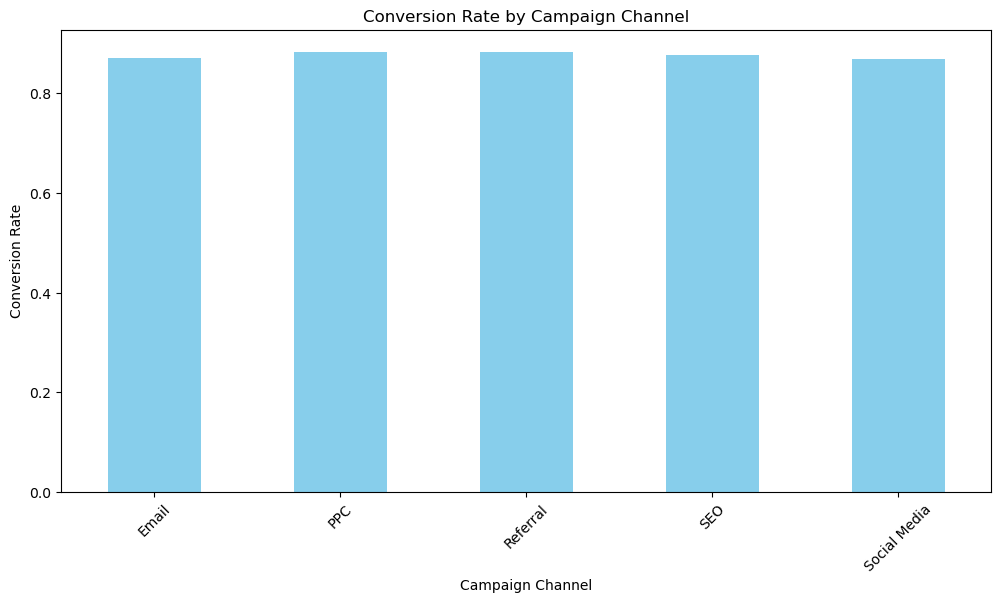

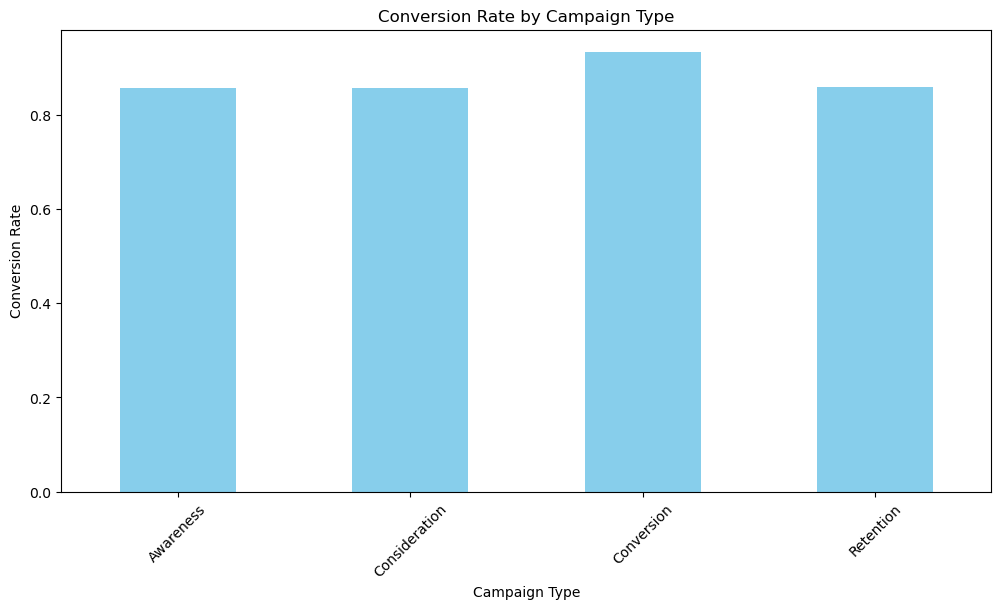

In [31]:
# Group by CampaignChannel and CampaignType to analyze conversion rates
channel_effectiveness = df.groupby('CampaignChannel')['Conversion'].mean()
type_effectiveness = df.groupby('CampaignType')['Conversion'].mean()

# Print the results
print("Channel Effectiveness:\n", channel_effectiveness)
print("\nType Effectiveness:\n", type_effectiveness)

# Visualize the effectiveness
plt.figure(figsize=(12, 6))
channel_effectiveness.plot(kind='bar', title='Conversion Rate by Campaign Channel', color='skyblue')
plt.ylabel('Conversion Rate')
plt.xlabel('Campaign Channel')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
type_effectiveness.plot(kind='bar', title='Conversion Rate by Campaign Type', color='skyblue')
plt.ylabel('Conversion Rate')
plt.xlabel('Campaign Type')
plt.xticks(rotation=45)
plt.show()